In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load Dataset
df = pd.read_csv('LoanApprovalDataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
#Basic Dataset Information
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)

Shape: (4269, 13)

Missing Values:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Duplicate Rows: 0

Data Types:
 loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


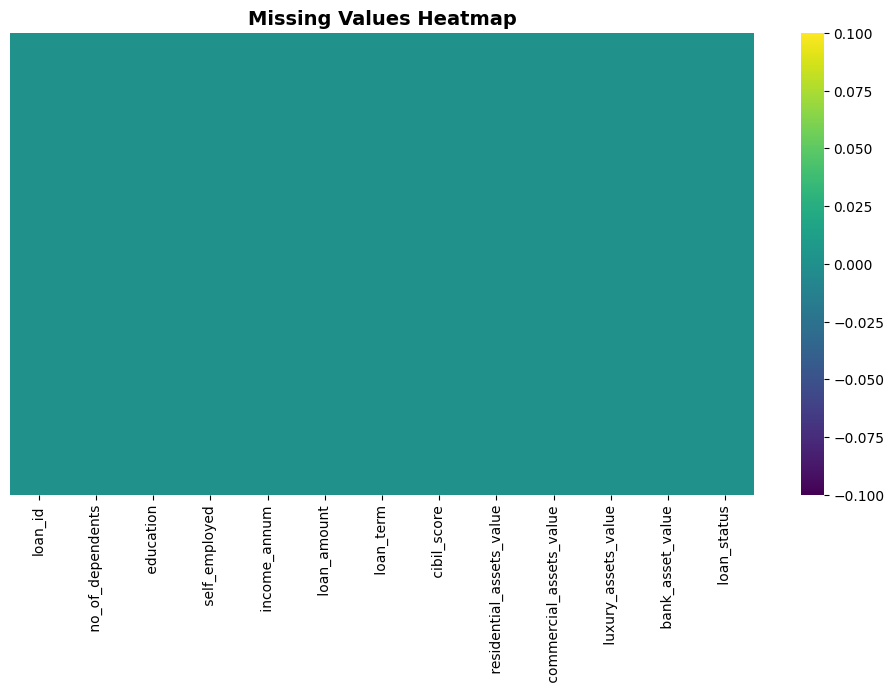

In [ ]:
#Missing Values Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
#Clean Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [ ]:
#Define Features and Target
X = df.drop(columns=['loan_id', 'loan_status'])
y = df['loan_status']

In [ ]:
#Split Data (Stratify to keep class ratio balanced)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2988, 11)
Test shape: (1281, 11)


In [8]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
#Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_resampled.value_counts())

Before SMOTE:
 loan_status
Approved    1859
Rejected    1129
Name: count, dtype: int64

After SMOTE:
 loan_status
Approved    1859
Rejected    1859
Name: count, dtype: int64


In [ ]:
#Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_transformed)

print("🔎 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

🔎 Random Forest Classification Report:
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       797
    Rejected       0.98      0.96      0.97       484

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [ ]:
#Logistic Regression (Bonus Model)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_resampled, y_train_resampled)
y_pred_log = log_model.predict(X_test_transformed)

print("📉 Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

📉 Logistic Regression Report:
              precision    recall  f1-score   support

    Approved       0.82      0.82      0.82       797
    Rejected       0.70      0.71      0.70       484

    accuracy                           0.78      1281
   macro avg       0.76      0.76      0.76      1281
weighted avg       0.78      0.78      0.78      1281



In [ ]:
#Decision Tree Model (Bonus Model)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_model.predict(X_test_transformed)

print("🌳 Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))

🌳 Decision Tree Report:
              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       797
    Rejected       0.98      0.97      0.97       484

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



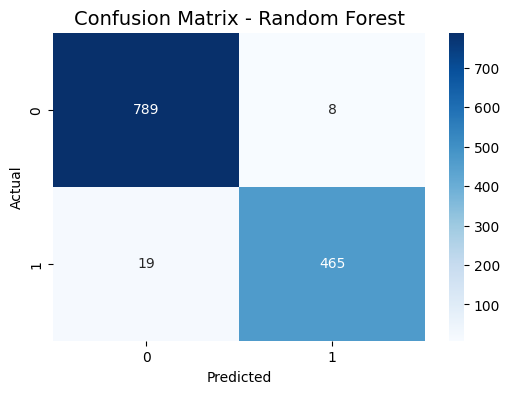

In [ ]:
#Confusion Matrix Heatmap (Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

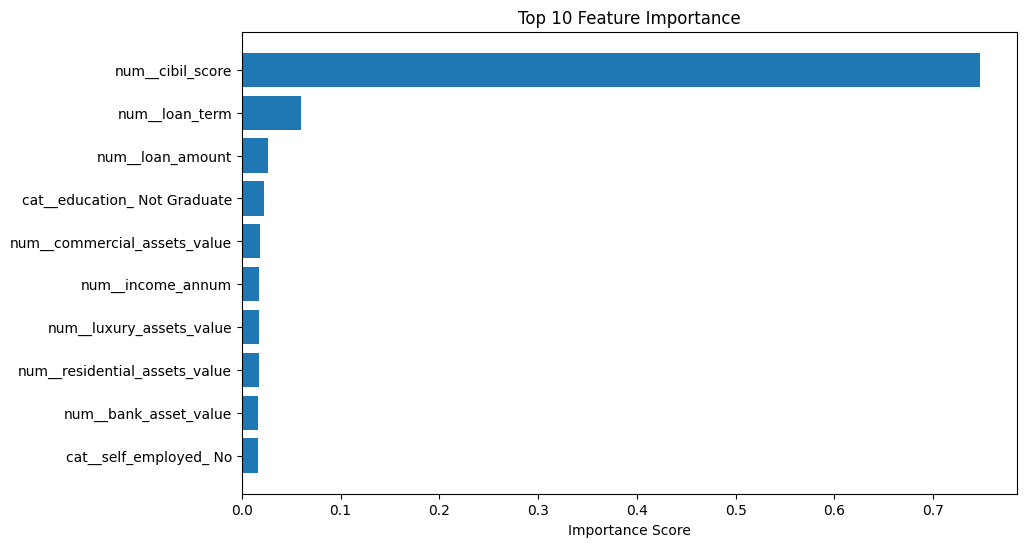

In [ ]:
#Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.title("Top 10 Feature Importance")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Final Comparison Between Models
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Precision': [
        classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_log, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_log, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_log, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['f1-score']
    ]
})

results


,Model,Precision,Recall,F1-Score
0,Random Forest,0.978979,0.978923,0.978874
1,Logistic Regression,0.775551,0.775176,0.775355
2,Decision Tree,0.979692,0.979703,0.979695
